# Data Visualization Project - Flight Dataset
## by Priyanka Krishnan

## Investigation Overview
>The goal of the project is to investigate and visualize the flight dataset to understand the factors causing flight delays along with carrier performance with respect to cancellations and delays.

## Dataset Overview
>The dataset is from the Bureau of Transportation Statistics and can be downloaded directly from https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009.
>
>The downloaded files were in zip format ('bz2'). This dataset consists of flight related details like month, day of week, carriers, arrival & departure delays, and reasons for delays. For the purpose of this project I have used data from years 2006-2008 (last three years in the dataset).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### Gather Data - Load data into dataframes

In [2]:
#Read CSV files for year 2008 into dataframe df_2008
df_2008 = pd.read_csv("2008.csv.bz2", compression='bz2')

#Read CSV files for year 2007 into dataframe df_2007
df_2007 = pd.read_csv("2007.csv.bz2", compression='bz2')

#Read CSV files for year 2006 into dataframe df_2006
df_2006 = pd.read_csv("2006.csv.bz2", compression='bz2')

>All the three datasets have 29 columns and about 7 million+ records each.

#### Assess Data

In [3]:
#Display some records from df_2008
df_2008.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5735095,2008,10,30,4,949.0,947,1029.0,1029,HA,119,...,5.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1017136,2008,2,16,6,1109.0,1020,1355.0,1308,NW,748,...,14.0,26.0,0,NaN,0,14.0,0.0,0.0,0.0,33.0
1150943,2008,2,19,2,1237.0,1240,1630.0,1639,CO,290,...,13.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2145554,2008,4,11,5,1310.0,1318,1452.0,1503,FL,993,...,9.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6198430,2008,11,2,7,1211.0,1210,1323.0,1325,WN,2844,...,6.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Display some records from df_2007
df_2007.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1905873,2007,4,26,4,1045.0,1050,1212.0,1205,WN,884,...,3,20,0,NaN,0,0,0,0,0,0
5944608,2007,10,7,7,1339.0,1345,1447.0,1455,EV,4390,...,10,18,0,NaN,0,0,0,0,0,0
405405,2007,1,22,1,1120.0,1120,1224.0,1235,MQ,3895,...,5,17,0,NaN,0,0,0,0,0,0
1024498,2007,2,11,7,610.0,615,821.0,824,NW,513,...,8,24,0,NaN,0,0,0,0,0,0
550606,2007,1,18,4,600.0,600,1032.0,1031,AS,808,...,7,20,0,NaN,0,0,0,0,0,0


In [5]:
#Display some records from df_2006
df_2006.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3794916,2006,7,22,6,841.0,830,1100.0,1059,US,211,...,4,16,0,NaN,0,0,0,0,0,0
1294212,2006,3,13,1,1956.0,1945,2110.0,2039,OO,6896,...,26,20,0,NaN,0,31,0,0,0,0
1395350,2006,3,15,3,1045.0,1045,1328.0,1344,UA,1230,...,4,11,0,NaN,0,0,0,0,0,0
4029863,2006,7,20,4,2157.0,2107,2357.0,2317,AS,695,...,6,13,0,NaN,0,0,40,0,0,0
2686331,2006,5,15,1,825.0,826,1112.0,1115,MQ,3997,...,3,17,0,NaN,0,0,0,0,0,0


In [6]:
# Display data column info for df_2008
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [7]:
# Display data column info for df_2007
df_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [8]:
# Display data column info for df_2006
df_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

>All 29 columns names are the same. The datatype for the fields - TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay - are float64 in df_2008 whereas they are of type int64 in df_2007 and df_2006.

In [9]:
# Check number of non null values in each column of df_2008
df_2008.count()

Year                 7009728
Month                7009728
DayofMonth           7009728
DayOfWeek            7009728
DepTime              6873482
CRSDepTime           7009728
ArrTime              6858079
CRSArrTime           7009728
UniqueCarrier        7009728
FlightNum            7009728
TailNum              6926363
ActualElapsedTime    6855029
CRSElapsedTime       7008884
AirTime              6855029
ArrDelay             6855029
DepDelay             6873482
Origin               7009728
Dest                 7009728
Distance             7009728
TaxiIn               6858079
TaxiOut              6872670
Cancelled            7009728
CancellationCode      137434
Diverted             7009728
CarrierDelay         1524735
WeatherDelay         1524735
NASDelay             1524735
SecurityDelay        1524735
LateAircraftDelay    1524735
dtype: int64

>The total number of records in the dataframe df_2008 is 7009728. 
>
>The following columns have missing values:
>   1. DepTime - 6873482             (136,246 missing values) 
>   2. ArrTime - 6858079             (151,649 missing values)
>   3. TailNum - 6926363             ( 83,365 missing values)
>   4. ActualElapsedTime - 6855029   (154,699 missing values)
>   5. CRSElapsedTime - 7008884      (    844 missing values)
>   6. AirTime - 6855029             (154,699 missing values)
>   7. ArrDelay - 6855029            (154,699 missing values)
>   8. DepDelay - 6873482            (136,246 missing values)
>   9. TaxiIn - 6858079              (151,649 missing values)
>   10. TaxiOut - 6872670            (137,058 missing values)
>   11. CancellationCode - 137434  (6,872,294 missing values)
>   12. CarrierDelay - 1524735     (5,484,993 missing values)
>   13. WeatherDelay - 1524735     (5,484,993 missing values)
>   14. NASDelay - 1524735         (5,484,993 missing values)
>   15. SecurityDelay - 1524735    (5,484,993 missing values)
>   16. LateAircraftDelay- 1524735 (5,484,993 missing values)

In [10]:
#cancellation count by code for df_2008 - this adds up to 137434 as shown above
df_2008.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [11]:
# Flights that were cancelled (137434) and diverted (14215) add up to 151,649 
# which is the number of records that do not have ArrTime and TaxiIn recorded. 
# Will not be deleting any records from the dataset with no values due to this finding. Looks like the data is clean.

df_2008[(df_2008.Cancelled == 0)  & (df_2008.ArrTime.isna())]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1763,2008,1,3,4,922.0,915,NaN,1050,WN,1069,...,NaN,12.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
1911,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2651,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2726,2008,1,4,5,737.0,705,NaN,825,WN,178,...,NaN,13.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
3383,2008,1,4,5,931.0,930,NaN,1145,WN,2011,...,NaN,10.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978884,2008,12,21,7,728.0,715,NaN,1150,CO,282,...,NaN,16.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
6980577,2008,12,19,5,1832.0,1730,NaN,2050,CO,787,...,NaN,97.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
6980617,2008,12,19,5,1525.0,1525,NaN,1712,CO,1030,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
6982054,2008,12,17,3,1317.0,1245,NaN,1418,CO,581,...,NaN,23.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checking the number of records that have no value for columns - CarrierDelay, WeatherDelay
# NASDelay, SecurityDelay and LateAircraftDelay in df_2008_clean dataframe
# The number of such records is 5484993. ALl NaN can be filled with zero as part of cleaning exercise
df_2008[(df_2008.CarrierDelay.isna())  & (df_2008.WeatherDelay.isna()) & (df_2008.NASDelay.isna()) &
        (df_2008.SecurityDelay.isna())  & (df_2008.LateAircraftDelay.isna())]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check number of non null values in each column of df_2007
df_2007.count()

Year                 7453215
Month                7453215
DayofMonth           7453215
DayOfWeek            7453215
DepTime              7292467
CRSDepTime           7453215
ArrTime              7275288
CRSArrTime           7453215
UniqueCarrier        7453215
FlightNum            7453215
TailNum              7453193
ActualElapsedTime    7275288
CRSElapsedTime       7452221
AirTime              7275288
ArrDelay             7275288
DepDelay             7292467
Origin               7453215
Dest                 7453215
Distance             7453215
TaxiIn               7453215
TaxiOut              7453215
Cancelled            7453215
CancellationCode      160749
Diverted             7453215
CarrierDelay         7453215
WeatherDelay         7453215
NASDelay             7453215
SecurityDelay        7453215
LateAircraftDelay    7453215
dtype: int64

>The total number of records in the dataframe df_2007 is 7453215. 
>
>The following columns have missing values:
>    1. DepTime - 7292467             (160,748 missing values) 
>    2. ArrTime - 7275288             (177,927 missing values)
>    3. TailNum - 7453193             (     22 missing values)
>    4. ActualElapsedTime - 7275288   (177,927 missing values)
>    5. CRSElapsedTime - 7452221      (    994 missing values)
>    6. AirTime - 7275288             (177,927 missing values)
>    7. ArrDelay - 7275288            (177,927 missing values)
>    8. DepDelay - 7292467            (160,748 missing values)
>    9. CancellationCode - 160749   (7,292,466 missing values)
    

In [14]:
#cancellation count by code for df_2007 - this adds up to 160749 as shown above
df_2007.CancellationCode.value_counts()

A    66779
B    61936
C    31995
D       39
Name: CancellationCode, dtype: int64

In [15]:
# Check number of non null values in each column of df_2006
df_2006.count()

Year                 7141922
Month                7141922
DayofMonth           7141922
DayOfWeek            7141922
DepTime              7019988
CRSDepTime           7141922
ArrTime              7003802
CRSArrTime           7141922
UniqueCarrier        7141922
FlightNum            7141922
TailNum              7141922
ActualElapsedTime    7003802
CRSElapsedTime       7141918
AirTime              7003802
ArrDelay             7003802
DepDelay             7019988
Origin               7141922
Dest                 7141922
Distance             7141922
TaxiIn               7141922
TaxiOut              7141922
Cancelled            7141922
CancellationCode      121934
Diverted             7141922
CarrierDelay         7141922
WeatherDelay         7141922
NASDelay             7141922
SecurityDelay        7141922
LateAircraftDelay    7141922
dtype: int64

>The total number of records in the dataframe df_2006 is 7141922.
>
>The following columns have missing values:
>1. DepTime - 7019988             (121,934 missing values) 
>2. ArrTime - 7003802             (138,120 missing values)
>3. ActualElapsedTime - 7003802   (138,120 missing values)
>4. CRSElapsedTime - 7141918      (      4 missing values)
>5. AirTime - 7003802             (138,120 missing values)
>6. ArrDelay - 7003802            (138,120 missing values)
>7. DepDelay - 7019988            (121,934 missing values)
>8. CancellationCode - 121934   (7,019,988 missing values)

In [16]:
#cancellation count by code for df_2006 - this adds up to 121934 as shown above
df_2006.CancellationCode.value_counts()

A    55655
B    37913
C    28209
D      157
Name: CancellationCode, dtype: int64

#### Clean Data

In [17]:
# Make copies of each dataset
df_2008_clean = df_2008.copy()
df_2007_clean = df_2007.copy()
df_2006_clean = df_2006.copy()

In [18]:
# Filling zero for all NaN values for columns CarrierDelay, WeatherDelay, NASDelay
# SecurityDelay and LateAircraftDelay in dataset df_2008_clean. 
# This is done to make it uniform across the other two datasets. We assume this was left
# blank instead of entering 0 for 2008 data. 
df_2008_clean['CarrierDelay'] = pd.to_numeric(df_2008_clean['CarrierDelay']).fillna(0)
df_2008_clean['WeatherDelay'] = pd.to_numeric(df_2008_clean['WeatherDelay']).fillna(0)
df_2008_clean['NASDelay'] = pd.to_numeric(df_2008_clean['NASDelay']).fillna(0)
df_2008_clean['SecurityDelay'] = pd.to_numeric(df_2008_clean['SecurityDelay']).fillna(0)
df_2008_clean['LateAircraftDelay'] = pd.to_numeric(df_2008_clean['LateAircraftDelay']).fillna(0)

In [19]:
# Check count for the columns CarrierDelay, WeatherDelay, NASDelay
# SecurityDelay and LateAircraftDelay in dataset df_2008_clean
df_2008_clean.count()

Year                 7009728
Month                7009728
DayofMonth           7009728
DayOfWeek            7009728
DepTime              6873482
CRSDepTime           7009728
ArrTime              6858079
CRSArrTime           7009728
UniqueCarrier        7009728
FlightNum            7009728
TailNum              6926363
ActualElapsedTime    6855029
CRSElapsedTime       7008884
AirTime              6855029
ArrDelay             6855029
DepDelay             6873482
Origin               7009728
Dest                 7009728
Distance             7009728
TaxiIn               6858079
TaxiOut              6872670
Cancelled            7009728
CancellationCode      137434
Diverted             7009728
CarrierDelay         7009728
WeatherDelay         7009728
NASDelay             7009728
SecurityDelay        7009728
LateAircraftDelay    7009728
dtype: int64

In [20]:
# Append all three dataframes and save into master df 'df_fltdata'
# This also implicitly converts TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, 
# NASDelay, SecurityDelay and LateAircraftDelay in df_2007_clean and df_2006_clean 
# from int to float before appending into df_fltdata. 

df_fltdata=df_2006_clean.append([df_2007_clean,df_2008_clean])

# Display number of rows and columns of appended data
df_fltdata.shape

(21604865, 29)

In [21]:
# display sample data from df_fltdata
df_fltdata.sample(25)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2239334,2008,4,3,4,610.0,610,825.0,829,OH,5599,...,15.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1576426,2006,3,10,5,611.0,613,1002.0,1012,AA,568,...,4.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4228270,2007,7,3,2,1034.0,1037,1409.0,1400,AA,840,...,23.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3586003,2006,7,29,6,1318.0,1305,1549.0,1540,WN,617,...,3.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3060706,2007,5,8,2,1806.0,1810,1909.0,1917,DL,1175,...,16.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
36591,2008,1,14,1,2055.0,2055,2310.0,2335,WN,877,...,4.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4493884,2008,8,1,5,2025.0,1956,2146.0,2136,UA,1639,...,4.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4334227,2008,8,31,7,1020.0,1030,1133.0,1139,XE,98,...,3.0,18.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1149313,2008,2,24,7,1214.0,1215,1356.0,1353,CO,1605,...,6.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
5559355,2006,10,30,1,1604.0,1558,1738.0,1730,UA,267,...,5.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [22]:
# display count of data from df_fltdata
df_fltdata.count()

Year                 21604865
Month                21604865
DayofMonth           21604865
DayOfWeek            21604865
DepTime              21185937
CRSDepTime           21604865
ArrTime              21137169
CRSArrTime           21604865
UniqueCarrier        21604865
FlightNum            21604865
TailNum              21521478
ActualElapsedTime    21134119
CRSElapsedTime       21603023
AirTime              21134119
ArrDelay             21134119
DepDelay             21185937
Origin               21604865
Dest                 21604865
Distance             21604865
TaxiIn               21453216
TaxiOut              21467807
Cancelled            21604865
CancellationCode       420117
Diverted             21604865
CarrierDelay         21604865
WeatherDelay         21604865
NASDelay             21604865
SecurityDelay        21604865
LateAircraftDelay    21604865
dtype: int64

#### Notes:

> The dataset has 29 columns. Description of some of the columns are given below:
>1. `DepTime` is the actual departure time (local, hhmm)
>2. `CRSDepTime` is the scheduled departure time (local, hhmm)
>3. `ArrTime` is the actual arrival time (local, hhmm)
>4. `CRSArrTime` is the scheduled arrival time (local, hhmm)
>5. `UniqueCarrier` is unique carrier code which represent the airlines, we have 21 such codes. Example: US stands for Puerto Rico International Airlines Inc., WN stands for Southwest Airlines Co., YV stands for Mesa Airlines, Inc. and so on. 
>6. `ActualElapsedTime` is the actual elapsed time of flight, in minutes
>7. `CRSElapsedTime` is the CRS elapsed time of flight (aka estimated elapse time), in minutes
>8. `ArrDelay` is the difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
>9. `DepDelay` is the difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
>10. `TaxiIn` is the wheels down and arrival at the destination airport gate, in minutes
>11. `TaxiOut` is the time elapsed between departure from the origin airport gate and wheels off, in minutes
>12. `CancellationCode` is the reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
>13. `NASDelay` where NAS stands for 	National Airspace System
>14. `Diverted` 1 = yes, 0 = no
>15. `Cancelled` 1 = yes, 0 = no


> The main features of interest are fields that are responsible for causing delays and cancellationsand how it corresponds to individual carriers. These can be used to figure out the performance and characteristics of flights to different destinations.


> The features that attribute to month, day of week, arrival and departure delays (in minutes), cancellation codes and cancellation reasons will help support my investigation into the features of interest. We can also try to find relationship between flight carrier and the delays. 

## Univariate Exploration

> In this section, investigate distributions of individual variables.

## What are the most common reasons of flight cancellation?

>Carrier and Weather related cancellations are most common.

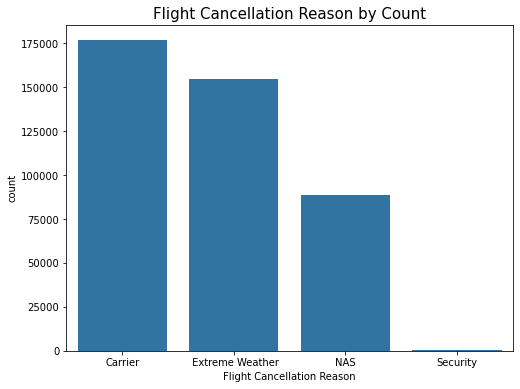

A    176764
B    154753
C     88392
D       208
Name: CancellationCode, dtype: int64

In [23]:
# Count the frequency of unique values in the `CancellationCode` column of df_fltdata dataframe. 
# By default, returns the decreasing order of the frequency.
cc_counts = df_fltdata['CancellationCode'].value_counts()
cc_order = cc_counts.index 

#Define Plot
fig, ax = plt.subplots(figsize=(8,6))
base_color=sb.color_palette()[0]
sb.countplot(data=df_fltdata,x='CancellationCode',color=base_color, order=cc_order)
ax.set_xticklabels(['Carrier',' Extreme Weather','NAS','Security'])
plt.xlabel('Flight Cancellation Reason')
plt.title('Flight Cancellation Reason by Count', fontsize = 15)

# Dsiplay the plot
plt.show()

cc_counts

>Note: Cancellation Codes:
>
>(A) Air Carrier;
>(B) Extreme Weather;
>(C) National Aviation System (NAS); and
>(D) Security.
>
>As per the above graph, Carrier and Weather are the most likely cause of flight cancellations followed by National Aviation System (NAS). Security is the least likely cause of flight cancellation.
>
>Now that we know the highest flight cancellation reason is due to Carriers which may include reasons like Aircraft cleaning, Aircraft damage, Fueling, Medical emergency, Weight and balance delays and so on, I would like to investigate later which flight carrier tops the cancellation chart based on Unique Carrier codes.
>
>I would like to investigate further on which carrier has the most cancellations and count of flights broken down by cancellation reason and so on.

#### Which day of the week has the most number of flights scheduled?

In [24]:
# Count the frequency of unique values in the 'DayOfWeek' column of df_fltdata dataframe. 
# By default, returns the decreasing order of the frequency.
dayofweek_counts = df_fltdata['DayOfWeek'].value_counts()
dayofweek_order = dayofweek_counts.index 

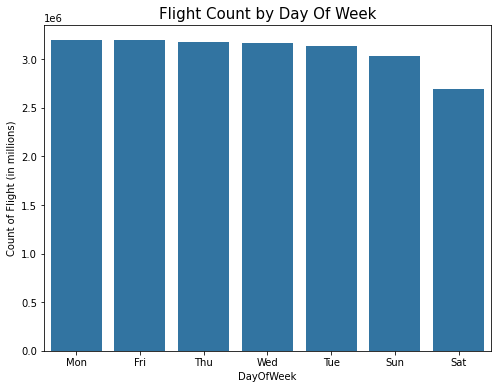

1    3196729
5    3193461
4    3182911
3    3171475
2    3140933
7    3028951
6    2690405
Name: DayOfWeek, dtype: int64

In [25]:
#Define Plot
fig, ax = plt.subplots(figsize=(8,6))
base_color=sb.color_palette()[0]
sb.countplot(data=df_fltdata,x='DayOfWeek',color=base_color, order=dayofweek_order)
ax.set_xticklabels(['Mon','Fri','Thu','Wed','Tue','Sun','Sat'])
plt.xlabel('DayOfWeek')
plt.ylabel('Count of Flight (in millions)')
plt.title('Flight Count by Day Of Week', fontsize = 15)

# Dsiplay the plot
plt.show()

dayofweek_counts

>As per the plot above, people travel most on Mondays and Fridays which seems right to utilize the weekend. Saturday has the least number of flights booked. 

#### Which months have the most number of flights scheduled?

In [26]:
# Count the frequency of unique values in the 'Month' column of df_fltdata dataframe. 
# By default, returns the decreasing order of the frequency.
month_counts = df_fltdata['Month'].value_counts()
month_order = month_counts.index 

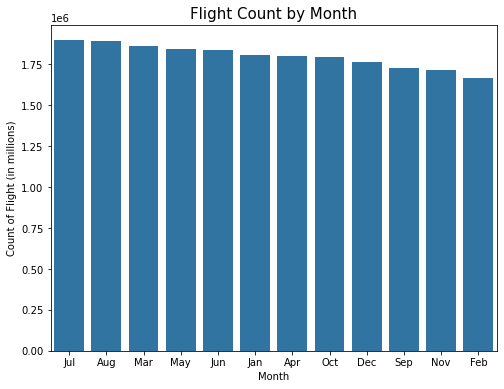

7     1897735
8     1894290
3     1860516
5     1840821
6     1836260
1     1808611
4     1798125
10    1797915
12    1763855
9     1726032
11    1714618
2     1666087
Name: Month, dtype: int64

In [27]:
#Define Plot
fig, ax = plt.subplots(figsize=(8,6))
base_color=sb.color_palette()[0]
sb.countplot(data=df_fltdata,x='Month',color=base_color, order=month_order)
ax.set_xticklabels(['Jul','Aug','Mar','May','Jun','Jan','Apr','Oct','Dec','Sep','Nov','Feb'])
plt.xlabel('Month')
plt.ylabel('Count of Flight (in millions)')
plt.title('Flight Count by Month', fontsize = 15)

# Dsiplay the plot
plt.show()

month_counts

>Top 5 months with flights scheduled are Jul, Aug, Mar, May and Jun (in the same order). The least number of flights scheduled are in Feb. This could be due to weather.

#### Distribution of flight departure time 

In [28]:
#Filter only data with DepTime information, so removing NaN values. If not done it gives an error.
df_dep_time = df_fltdata[df_fltdata.DepTime.notnull()]

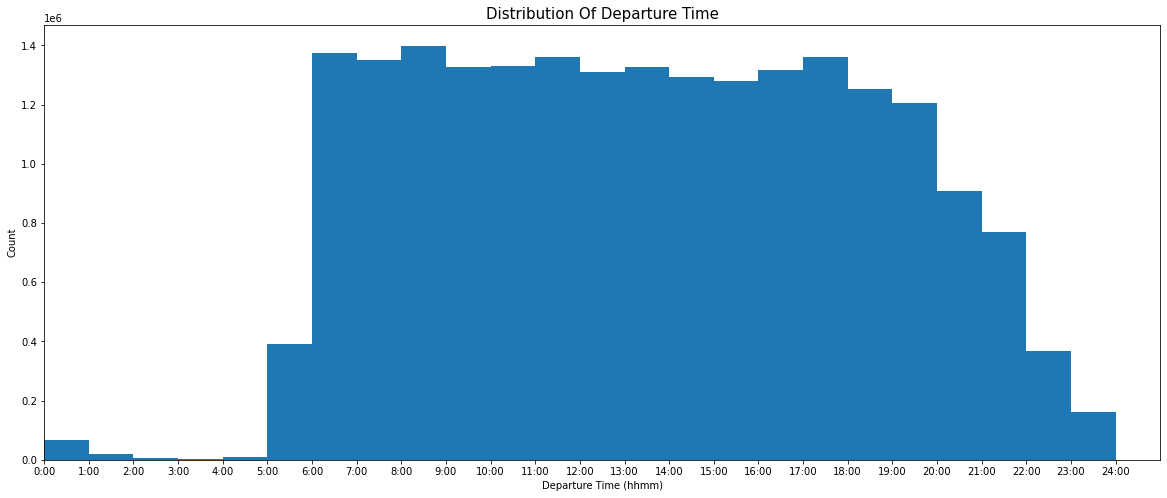

In [29]:
#Define plot
fig, ax = plt.subplots(figsize=(20,8))
bin_edges=np.arange(0,2500,100)
tick_props = np.arange(0, 2500, 100)
plt.hist(df_dep_time.DepTime,bins = bin_edges)
plt.xlim(0,2500)

ax.set_xticklabels(['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00',
                    '10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00',
                    '19:00','20:00','21:00','22:00','23:00','24:00'])
plt.xticks(tick_props)
plt.xlabel('Departure Time (hhmm)')
plt.ylabel('Count')
plt.title('Distribution Of Departure Time', fontsize = 15);

# Dsiplay the plot
plt.show()

>From the above plot, we know that the maximum flight departure happens between 6 AM to 8 PM.

## What is the distribution of delay in flight arrivals? 

>Most flight arrival delay is between 0 to 50 minutes.

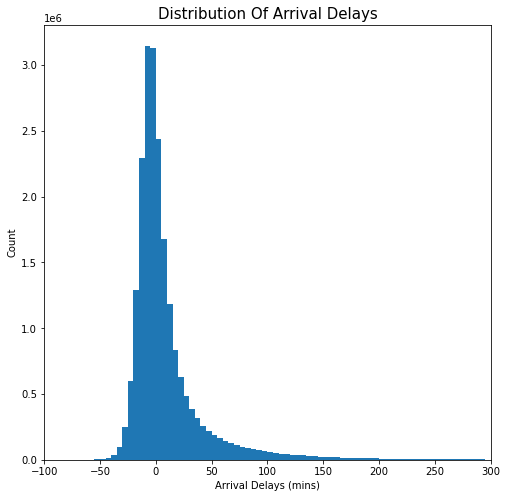

In [30]:
#Filter only data with ArrDelay information, so removing NaN values. If not done it gives an error.
df_arr_delay = df_fltdata[df_fltdata.ArrDelay.notnull()]

#Define plot
fig, ax = plt.subplots(figsize=(8,8))
# The data is concentrated between -60 and 300 we will set the x limits accordingly
bin_edges=np.arange(-60,300,5)
plt.hist(df_arr_delay.ArrDelay,bins = bin_edges)
#plt.yscale('log') - plot did not look good when I scaled it to log type
plt.xlim(-100,300)
plt.xlabel('Arrival Delays (mins)')
plt.ylabel('Count')
plt.title('Distribution Of Arrival Delays', fontsize = 15);

# Dsiplay the plot
plt.show()

>From the above histogram we can observe that the distribution is skewed towards right. We also notice that most of the arrival delay is between 0 to 50 minutes. And early arrivals between 0 to -50 minutes.

#### Distribution of depature delays

Lets look at how departure delays are distributed across the dataset.

In [31]:
#Filter only data with DepDelay information, so removing NaN values. If not done it gives an error.
df_dep_delay = df_fltdata[df_fltdata.DepDelay.notnull()]

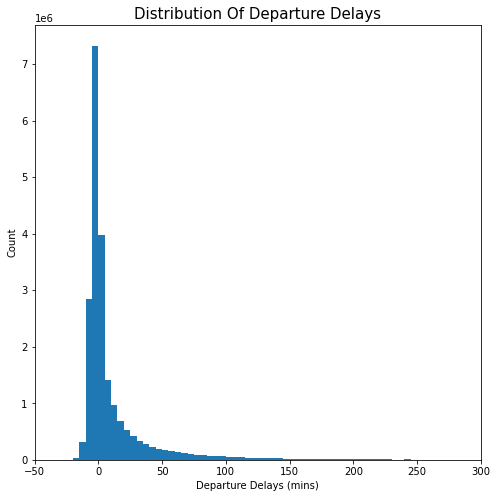

In [32]:
#Define plot
fig, ax = plt.subplots(figsize=(8,8))
# The data is concentrated between -30 and 250 we will set the x limits accordingly
bin_edges=np.arange(-30,250,5)
plt.hist(data = df_dep_delay, x= 'DepDelay',bins = bin_edges)
#plt.yscale('log')  - plot did not look good when I scaled it to log type
plt.xlim(-50,300)
plt.xlabel('Departure Delays (mins)')
plt.ylabel('Count')
plt.title('Distribution Of Departure Delays', fontsize = 15);

# Dsiplay the plot
plt.show()

>From the above histogram we can observe that the distribution is skewed towards right. We also notice that most of the departure delay is between 0 to 50 minutes similar to arrival delays. And early departures are between 0 to -20 minutes.

#### Notes:

> As part of Univariate exploration, I looked at cancellation codes, carrier codes , day of week, cancellation by month, distribution of flight departure time and arrival & departure delays distribution.
>
> It was observed that Carrier and Weather are the top two reasons of cancellation, whereas Security was the least likely reason for cancellation. 
>
> While exploring delays in arrival and departure of carrier flights to understand their distribution, I had to transform the histogram by placing limits on x axis since most of the data is concentrated within that limit.
>
> Most arrival delays and departure delays are between 0 to 50 minutes.



> Of the features I investigated I did not observe any unusual distributions.
>
>Filled in 0's for all NaN values for columns CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay in dataset df_2008_clean. This is done to make it uniform across the other two datasets. I assumed this was left  blank instead of entering 0 for 2008 data.
>
>Appended all three dataframes and saved into master df 'df_fltdata'. This also implicitly converted TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay in df_2007_clean and df_2006_clean from int to float before appending into df_fltdata. 
>
> To explore cancellations by carriers and cancellations by month, I modified the original dataset and filtered only those rows that had cancellations (A,B,C or D). 
>
> To explore arrival and departure delays, I created new dataframes that excluded NaN (missing) values so as to plot histograms.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 

## Which aircraft carrier has most cancellations?

>5 aircraft carriers which performed worst in terms of cancellation are:
>
>1. MQ - Envoy Air Inc.,
>2. AA - American Airlines Inc., 
>3. OO - SkyWest Airlines,
>4. UA - United Airlines, Inc. and ,
>5. WN - Southwest Airlines Co.

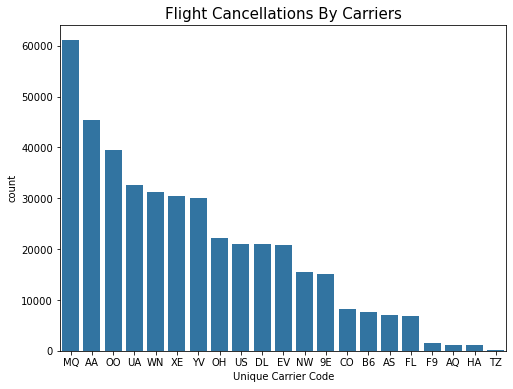

In [33]:
#Fetch data for only cancellation code (cc) data
df_fltdata_fcc = df_fltdata.query('CancellationCode in ["A","B","C","D"]')

# Count the frequency of unique values in the `UniqueCarrier` column of df_fltdata_fcc dataframe. 
# By default, returns the decreasing order of the frequency.
fcc_counts = df_fltdata_fcc['UniqueCarrier'].value_counts()
fcc_order = fcc_counts.index 

#Define Plot
fig, ax = plt.subplots(figsize=(8,6))
base_color=sb.color_palette()[0]
sb.countplot(data = df_fltdata_fcc, x = 'UniqueCarrier', color = base_color, order=fcc_order);
plt.xlabel('Unique Carrier Code');
plt.title('Flight Cancellations By Carriers', fontsize = 15);

# Dsiplay the plot
plt.show()

#fcc_counts

#### Flight cancellation by month

In [34]:
# Count the frequency of unique values in the `Month` column of df_fltdata_fcc dataframe. 
# By default, returns the decreasing order of the frequency.
mon_order = df_fltdata_fcc['Month'].value_counts(sort=False)

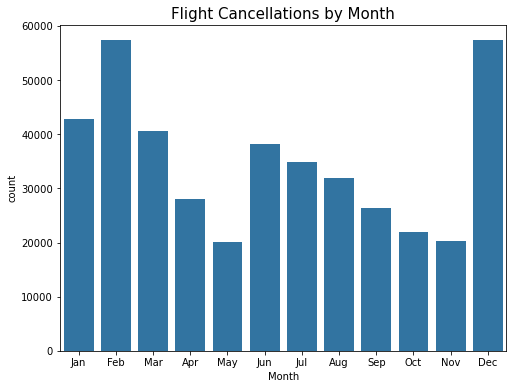

1     42872
2     57354
3     40646
4     28097
5     20127
6     38262
7     34839
8     31913
9     26370
10    21975
11    20295
12    57367
Name: Month, dtype: int64

In [35]:
#Define Plot
fig, ax = plt.subplots(figsize=(8,6))
base_color=sb.color_palette()[0]
sb.countplot(data=df_fltdata_fcc,x='Month',color=base_color, order=mon_order.index);
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month');
plt.title('Flight Cancellations by Month', fontsize = 15);

# Dsiplay the plot
plt.show()

mon_order

>Dec, Feb, Jan, Mar and Jun are the top 5 months with most cancellations. We can explore more on this to check if cancellations due to weather attribute to this trend above.

#### For each cancellation code (A,B,C, D) which month had the most cancellations?

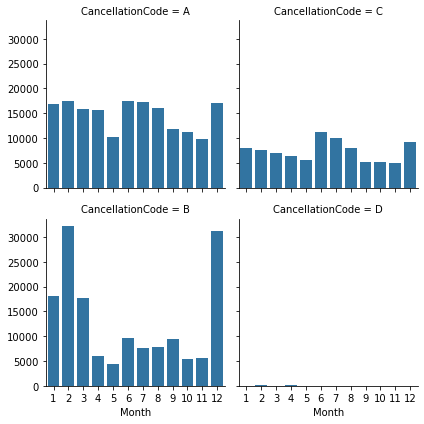

In [37]:
#Define plot
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sb.FacetGrid(data=df_fltdata_fcc,col='CancellationCode',col_wrap=2)
g.map(sb.countplot,'Month',order=month_order)

>The plot above for cancellation code "B" shows that the months of December, February, January and March had most cancellations due to bad weather. 
>
> Hardly any cancellation due to security - Cancellation Reason 'D'

## Which aircraft carrier has the highest delays at Arrival? Do the same carriers perform worse at this?

>Interestingly, the same set of 5 aircraft carriers also performed worst in arrival delays as well (order is little differnt). 
>1. AA - American Airlines Inc.,
>2. WN - Southwest Airlines Co.
>3. MQ - Envoy Air Inc.,
>4. UA - United Airlines, Inc. and ,
>5. WN - Southwest Airlines Co.

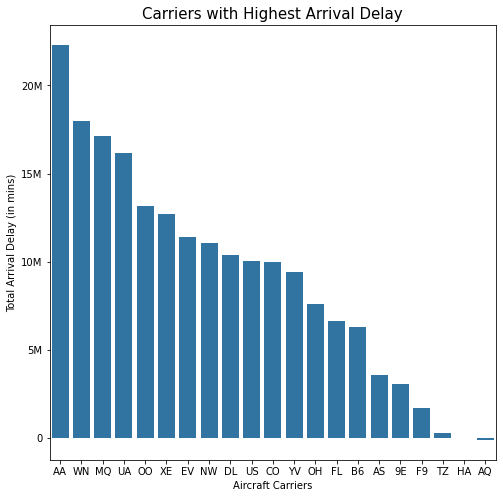

In [38]:
#Group by carrier codes and get sum of delays for each carrier
carrier_arrdelays = df_arr_delay.groupby('UniqueCarrier').ArrDelay.sum().sort_values(ascending=False)

#Define bar plot
fig, ax = plt.subplots(figsize=(8,8))
base_color = sb.color_palette()[0]
sb.barplot(x = carrier_arrdelays.index, y = carrier_arrdelays.values,color=base_color)
ax.set_yticklabels(['','0','5M','10M','15M','20M'])
plt.xlabel('Aircraft Carriers');
plt.ylabel('Total Arrival Delay (in mins)');
plt.title('Carriers with Highest Arrival Delay', fontsize = 15);

# Dsiplay the plot
plt.show()

#carrier_arrdelays

>From the above graph, 'AA - American Airlines Inc.' has the highest arrival delays followed by 'WN - Southwest Airlines Co.' among all aircraft carriers whereas 'AQ - 9 Air Co Ltd' has the most early arrivals followed by 'HA - Hawaiian Airlines, Inc.'

## Which aircraft carrier has the highest delays at Departure? Do the same carriers perform worst at this?

>Just like arrival delays, the same set of 5 aircraft carriers also performed worst in departure delays as well (order is little differnt). 
>1. WN - Southwest Airlines Co.
>2. AA - American Airlines Inc.,
>3. UA - United Airlines, Inc.,
>4. MQ - Envoy Air Inc.,
>5. OO - SkyWest Airlines,

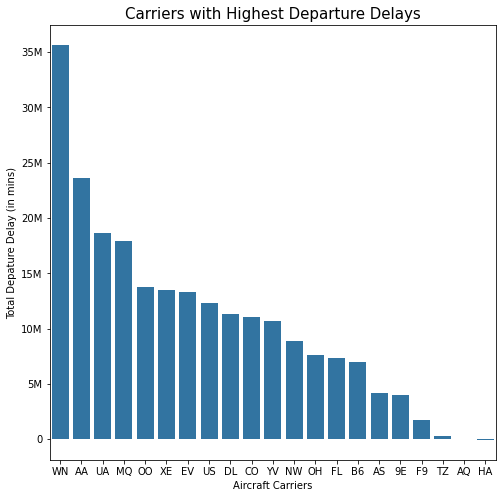

In [39]:
#Group by carrier codes and get sum of delays for each carrier
carrier_depdelays = df_dep_delay.groupby('UniqueCarrier').DepDelay.sum().sort_values(ascending=False)

#Define bar plot
fig, ax = plt.subplots(figsize=(8,8))
base_color = sb.color_palette()[0]
sb.barplot(x = carrier_depdelays.index, y = carrier_depdelays.values,color=base_color)
ax.set_yticklabels(['','0','5M','10M','15M','20M','25M','30M','35M'])
plt.xlabel('Aircraft Carriers');
plt.ylabel('Total Depature Delay (in mins)');
plt.title('Carriers with Highest Departure Delays', fontsize = 15);

# Dsiplay the plot
plt.show()

#carrier_depdelays

>From the above graph, 'WN - Southwest Airlines Co.' has the highest departure delays followed by 'AA - American Airlines Inc.' among all aircraft carriers whereas 'HA - Hawaiian Airlines, Inc.' has the most early departures. 

## Which aircraft carrier has most cancellations under each cancellation category?

> UA (United Airlines Inc) has the highest cancellation due to code 'A' which stands for Carriers
>
> MQ (Envoy Air Inc) has the highest cancellation due to code 'B' and 'C' which stands for Extreme Weather and NAS respectively
>
> XE (Delux Public Charter LLC dba JSX Air) has the highest cancellation due to code 'D' which stands for Security
>
>Note: The Cancellation Code A (Carrier) and B (Extreme Weather) are the most prominent ones; D (Security) attributes to the least number of cancellations. 

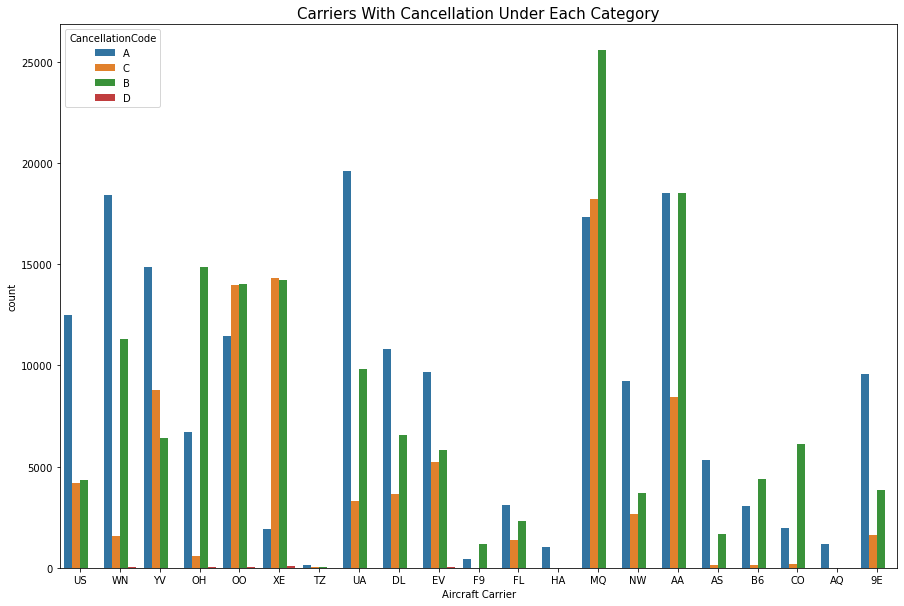

In [42]:
#Define plot
fig, ax = plt.subplots(figsize=(15,10))
sb.countplot(data = df_fltdata, x='UniqueCarrier', hue='CancellationCode')
plt.xlabel('Aircraft Carrier');
plt.title('Carriers With Cancellation Under Each Category', fontsize = 15)

#Display Plot
plt.show()

#### Is there any relationship between departure and arrival delays?

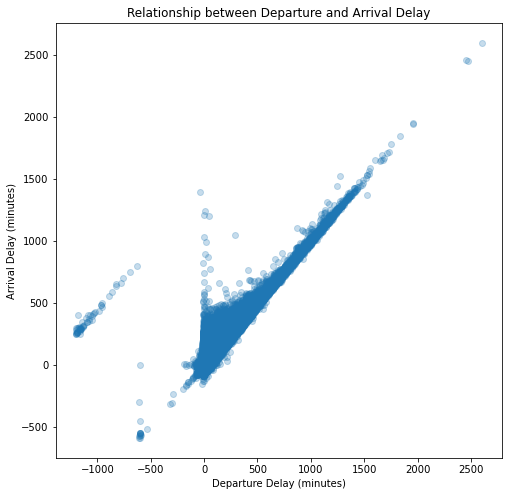

In [43]:
#Define plot
plt.figure(figsize=(8,8))
plt.scatter(data=df_fltdata.query('Cancelled == 0'),x='DepDelay',y='ArrDelay',alpha=1/4)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Relationship between Departure and Arrival Delay')

# Dsiplay the plot
plt.show()

>Looks like the plot shows positive correlation between departure and arrival delay. 

#### Is there any relationship between airport distance and mean arrival delay?

In [64]:
# filter out data where ArrDelay is greater than 0 and groupby Distance while taking the average of the ArrDelay
dist_arrdelay = df_fltdata.query('ArrDelay>0').groupby('Distance')['ArrDelay'].mean()

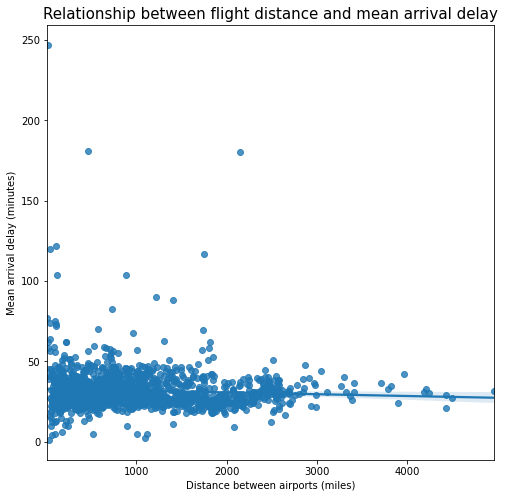

In [65]:
#Define plot
plt.figure(figsize=(8,8))
x = dist_arrdelay.index
y = dist_arrdelay.values
sb.regplot(x=x,y=y)
plt.xlabel('Distance between airports (miles)')
plt.ylabel('Mean arrival delay (minutes)')
plt.title('Relationship between flight distance and mean arrival delay',fontsize=15)

# Dsiplay the plot
plt.show()

> There seems to be no significant increase or decrease in average arrival delay as the distance between airports increases.

## How did each carrier (in proportion) perform in terms of arrival delays?

>TZ (ATA Airlines d/b/a ATA) has the worst performance followed by NW (Northwest Airlines Inc). The best performance is for HA (Hawaiian Airlines Inc).

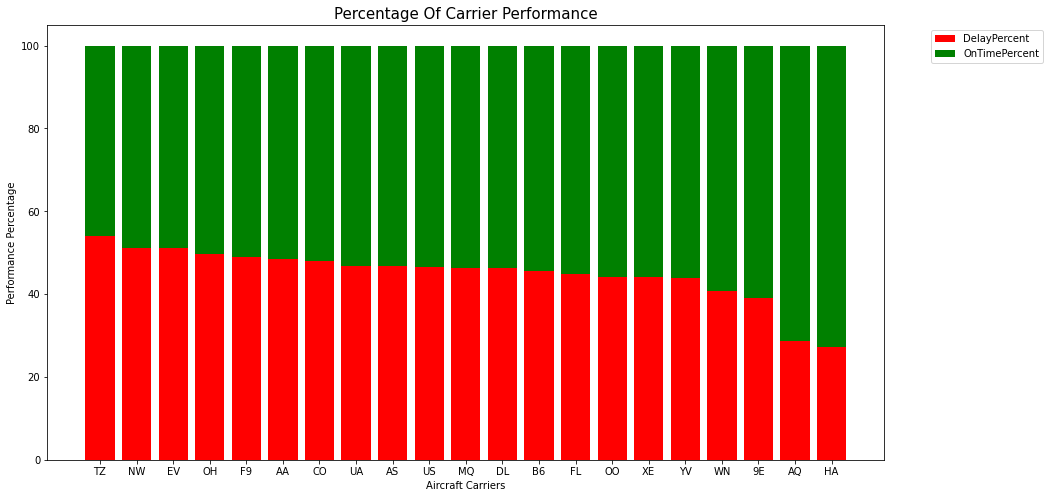

In [44]:
# Filter out data from df_fltdata wherein cancelled equals to 'No' and arrival delay has a positive value
arr_delay =df_fltdata.query('Cancelled == 0 & ArrDelay > 0').groupby('UniqueCarrier').size()
arr_delay = arr_delay.reset_index(name='DelayedFlights')
#arr_delay

# Filter out number of total flights that took off (not cancelled) (This will also include ArrDelay<=0)
total_flts=df_fltdata.query('Cancelled==0').groupby('UniqueCarrier').size()
total_flts = total_flts.reset_index(name='TotalFlights')
#total_flts

#Merge both dataframes on UniqueCarrier column
df_merge = pd.merge(arr_delay,total_flts,on='UniqueCarrier')
#df_merge

#Calculate the percentage of delayed flights
df_merge['DelayPercent'] = (df_merge['DelayedFlights']/df_merge['TotalFlights'])*100

#Create a new column for on time flights percentage
df_merge['OnTimePercent']= 100 - df_merge.DelayPercent
df_merge = df_merge.sort_values(by='DelayPercent',ascending=False)

#df_merge

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('medium')

#Define plot
plt.figure(figsize=(15,8))
plt.bar(df_merge['UniqueCarrier'], df_merge['DelayPercent'], color='r')
plt.bar(df_merge['UniqueCarrier'], df_merge['OnTimePercent'], bottom=df_merge['DelayPercent'], color='g')
plt.xlabel('Aircraft Carriers')
plt.ylabel('Performance Percentage')
plt.title('Percentage Of Carrier Performance',fontsize = 15)
plt.legend(['DelayPercent','OnTimePercent'],bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

# Dsiplay the plot
plt.show()

> The red bars show Delay percentage of total flights for each carrier whereas the green bars are the OnTime percentage of total flights for each carrier. Larger the red bar, worse the performance for the carrier.
>
>From the above plot, we can see that TZ (ATA Airlines d/b/a ATA) has the worst performance followed by NW (Northwest Airlines Inc). The best performance is for HA (Hawaiian Airlines Inc).

#### Notes:

> From Bivariate exploration, we could infer the following:

> MQ - Envoy Air Inc. has the most cancellation followed by AA - American Airlines Inc when all cancellations resons were included.
>
>UA (United Airlines Inc) has the highest cancellation due to code 'A' which stands for Carriers
>
>MQ (Envoy Air Inc) has the highest cancellation due to code 'B' and 'C' which stands for Extreme Weather and NAS respectively
>
> XE (Delux Public Charter LLC dba JSX Air) has the highest cancellation due to code 'D' which stands for Security

>Dec, Feb, Jan, Mar and Jun are the top 5 months with most cancellations when all cancellations resons were included.
>
>Months of Dec, Feb, Jan and Mar had most cancellations due to bad weather.

>'AA - American Airlines Inc.' has the highest arrival delays followed by 'WN - Southwest Airlines Co.' among all aircraft carriers whereas 'AQ - 9 Air Co Ltd' has the most early arrivals followed by 'HA - Hawaiian Airlines, Inc.'

>'WN - Southwest Airlines Co.' has the highest departure delays followed by 'AA - American Airlines Inc.' among all aircraft carriers whereas 'HA - Hawaiian Airlines, Inc.' has the most early departures.

>TZ (ATA Airlines d/b/a ATA) has the worst carrier performance followed by NW (Northwest Airlines Inc). The best carrier performance is for HA (Hawaiian Airlines Inc).


>Found a linear relationship between departure and arrival delays. The relationship between departure and arrival delays needs to be further analyzed in mutlivariate exploration.

>There seems to be no significant increase or decrease in average arrival delay as the distance between airports increases.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. 

## What were the major causes of delay across months for these years? Is the avg delay between 0 to 50 minutes?

>Weather, late aircraft and Carrier related delays contribute most to overall delays as compared to others. Security is the least probable cause of delay. 
>
> Yes, the average arrival delay is between 0 to 50 minutes

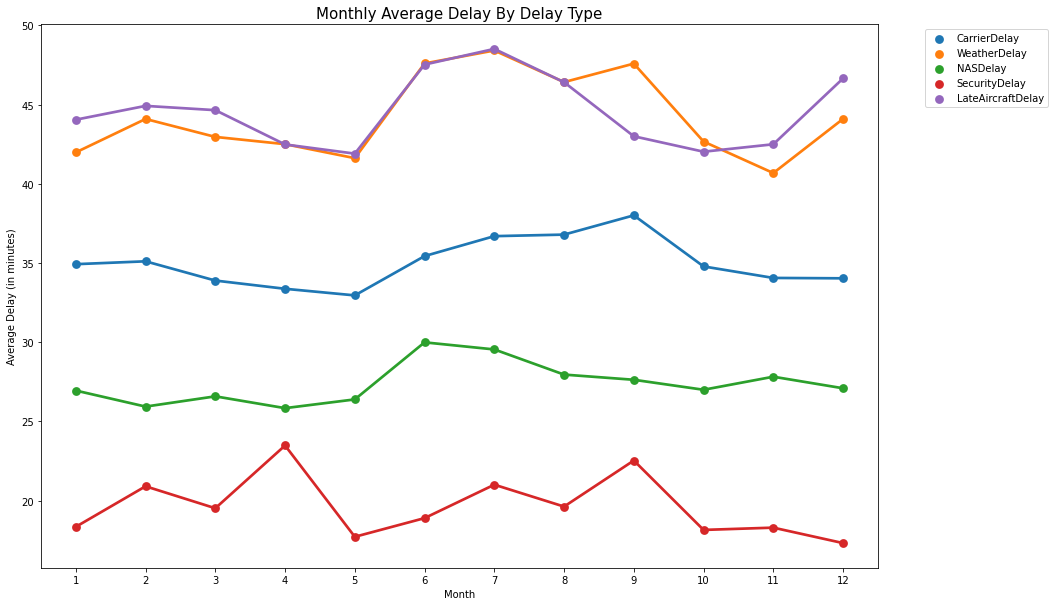

In [45]:
#Create dataframes that will group each delay by month and calculate average delay for each
carrier_by_month = df_fltdata.query('CarrierDelay > 0').groupby('Month')['CarrierDelay'].mean()
carrier_by_month = carrier_by_month.reset_index(name='CarrierDelay')
#carrier_by_month

weather_by_month = df_fltdata.query('WeatherDelay > 0').groupby('Month')['WeatherDelay'].mean()
weather_by_month = weather_by_month.reset_index(name='WeatherDelay')
#weather_by_month

nas_by_month = df_fltdata.query('NASDelay > 0').groupby('Month')['NASDelay'].mean()
nas_by_month = nas_by_month.reset_index(name='NASDelay')
#nas_by_month

security_by_month = df_fltdata.query('SecurityDelay > 0').groupby('Month')['SecurityDelay'].mean()
security_by_month = security_by_month.reset_index(name='SecurityDelay')
#security_by_month

lateaircraft_by_month = df_fltdata.query('LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean()
lateaircraft_by_month = lateaircraft_by_month.reset_index(name='LateAircraftDelay')
#lateaircraft_by_month

#Join all the dataframes into one on 'Month'
temp = carrier_by_month.merge(weather_by_month,on='Month')
temp = temp.merge(nas_by_month,on='Month')
temp = temp.merge(security_by_month,on='Month')
delays_by_month = temp.merge(lateaircraft_by_month,on='Month')
#delays_by_month

# Melt the Delay fields into DelayType and AvgDelay (in minutes)
delays_by_month = delays_by_month.melt(id_vars=['Month'], 
                          value_vars=['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 
                          var_name='DelayType', 
                          value_name='AvgDelay')
#delays_by_month.sample(5)

#Define plot
plt.figure(figsize = [15,10])
ax = sb.pointplot(data = delays_by_month, x = 'Month', y = 'AvgDelay', hue = 'DelayType')
ax.set_yticklabels([], minor = True)
plt.xlabel('Month')
plt.ylabel('Average Delay (in minutes)')
plt.title('Monthly Average Delay By Delay Type',fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

# Dsiplay the plot
plt.show();

>From the plot, it can be infered that both weather and late aircraft related delays contribute most to overall delays as compared to others.
>
>We can also see some spikes in the data which shows there is significant variation in delays from month to month
>
>Security is the least probable cause of delay

#### Is there any relationship between number of flights to a destination and arrival delay?

In [78]:
df_fltdata.ArrDelay.isna().count()

21604865

In [79]:
#Groups by destination and gets number of flights for each destination
group_destination = df_fltdata.groupby('Dest').size().sort_values(ascending=False)
group_destination = group_destination.reset_index(name = 'NumberOfFlights')
#group_destination

#Group by destination and calculate the mean of arrival delay for each destination
group_arrdelay = df_fltdata.groupby('Dest')['ArrDelay'].mean()
group_arrdelay = group_arrdelay.reset_index(name = 'AvgArrivalDelay')
#group_arrdelay

In [80]:
#Join the two dataframes into one on 'Dest'
delay_by_destination = group_destination.merge(group_arrdelay,on='Dest')
delay_by_destination.head(5)

,Dest,NumberOfFlights,AvgArrivalDelay
0,ATL,1233155,10.119503
1,ORD,1099967,15.940635
2,DFW,880194,8.522070
3,DEN,714593,7.051592
4,LAX,687261,7.122933


In [81]:
# Create a new column called 'TopDest' insert null values 
delay_by_destination['TopDest'] = np.nan

#Set Dest Ranking for every 20 records
delay_by_destination.iloc[:20,3]='Rank 1-20'
delay_by_destination.iloc[20:40,3]='Rank 21-40'
delay_by_destination.iloc[40:60,3]='Rank 41-60'
delay_by_destination.iloc[60:80,3]='Rank 61-80'
delay_by_destination.iloc[80:100,3]='Rank 81-100'

# Moving just the top 100 records
delay_by_destination = delay_by_destination.iloc[:100]

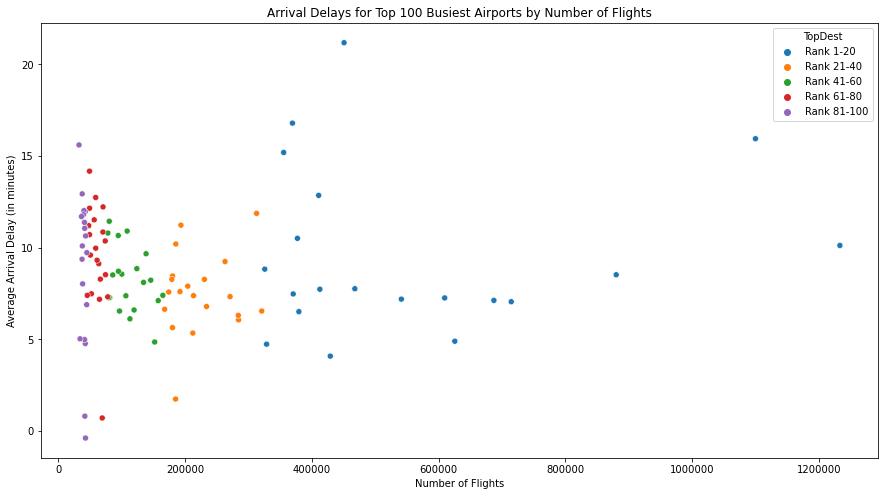

In [82]:
#Define plot
plt.figure(figsize = [15,8])
ax = sb.scatterplot(data = delay_by_destination, x = 'NumberOfFlights', y = 'AvgArrivalDelay',hue='TopDest')
ax.set_xticklabels(['','0','200000','400000','600000','800000','1000000','1200000'])
plt.xlabel('Number of Flights');
plt.ylabel('Average Arrival Delay (in minutes)');
plt.title('Arrival Delays for Top 100 Busiest Airports by Number of Flights')

# Dsiplay the plot
plt.show();

> From the above graph, it doesn't look like the number of flights to a destination has any effect on average arrival delay.

#### Notes:

> Multivariate analysis further supports the finding that weather conditions was the top reasons for delays. .

> It was interesting to see that number flights to a destination does not have much effect on the average arrival delay.
>
> There seems to be no significant increase or decrease in average arrival delay as the distance between airports increases either.

## Conclusion:

> Cancellations are mostly due to Carrier and Weather related reasons.
>
> Top 5 worst performing aircraft carriers in terms of cancellations and delays are:
    >MQ - Envoy Air Inc.,
    >AA - American Airlines Inc.,
    >OO - SkyWest Airlines,
    >UA - United Airlines, Inc. and ,
    >WN - Southwest Airlines Co.
>
> UA (United Airlines Inc) has the highest cancellation due to 'Carriers'. MQ (Envoy Air Inc) has the highest cancellation due to 'Extreme Weather' and 'National Aviation System' respectively. XE (Delux Public Charter LLC dba JSX Air) has the highest cancellation due to 'Security' reasons.
>
>TZ (ATA Airlines d/b/a ATA) and  NW (Northwest Airlines Inc) had the most percentage of flights delayed in years 2006 to 2008. HA (Hawaiian Airlines Inc) has the least percentage of flights delayed in years 2006 to 2008.
>
>Most of the arrival delays are in the range of 0 to 50 minutes.
>
> Weather, Late Aircraft and Carrier related delays were more significant than the other delays namely NAS and Security.

In [2]:
!jupyter nbconvert explanatory_flight_dataset.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook explanatory_flight_dataset_v1.ipynb to slides
[NbConvertApp] Writing 805390 bytes to explanatory_flight_dataset_v1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\priya\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\priya\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\priya\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\priya\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(noteb